# Sampling Distributions & Probability


This is about sampling, sampling distributions and probability.

## Goals
 - Develop familiarity with sampling distributions (e.g., their creation, visualizations, how changing parameters changes resulting distributions).
 - Understand how to use elements of probability theory to predict outcomes and understand a sample space.

Practice building a Sampling Distribution of Sample Means and a Sampling Distribution of Sample Standard Deviations. Visualize both distributions and examine their properties. 



## Sampling and Sampling Distributions


The differences between *sample* distributions and *sampling* distributions.

In [1]:
# Import statements

import random 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Generate sample.
a = np.empty(50)
for i in range(50):
    a[i] = random.gauss(mu=100, sigma=20)
    

In [3]:
# Use print statementments to check if code is correct.
print(f'a = {a}')
print(f'There are {len(a)} values in the sample.')

a = [116.81061573  84.05360836 119.05618239 135.24840119 103.274721
  98.31500428  71.56296785 126.52881661  74.05355038  92.24962722
  84.94028923 109.46101668  90.05631854  77.36282106 110.27460925
  68.99742681 100.44593043  97.8296054  110.38712732  92.56956896
 136.36049834 109.18019777  93.40098095  78.1709286   85.2127694
 115.19715325 114.61063045 110.69469154 103.03485068 135.32169782
  82.96899047  95.85796703 130.09424753 119.52962643 112.94066543
 113.7706914   60.56636719  59.40484949 115.0319195  118.13641498
  91.09552355  97.31477009  93.12587382  84.79747511 107.25819158
  83.30799353  96.49982642 118.13869137  82.52629038  76.91211598]
There are 50 values in the sample.


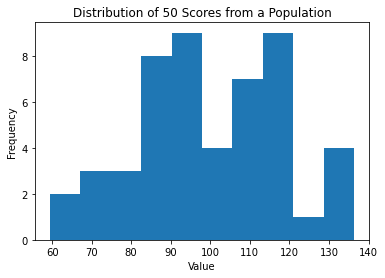

In [4]:
# Plot sample's distribution using a histogram.

plt.hist(a)
plt.title(f'Distribution of {len(a)} Scores from a Population')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

### <font color="blue"> *Problem 1a*</font>

In the code cell below, I want to calculate these values for the array plotted above. Use a print statement to report the results. Will use Bessel's correction (n-1) in the denominator.

In [5]:
# Calculate the mean and standard deviation of the array and print values.
sample_mean = np.mean(a)
sample_std = np.std(a, ddof=1)
print(f'The mean is {sample_mean} and the standard deviation is {sample_std}')


The mean is 99.6788219753941 and the standard deviation is 19.221981230781097


### <font color="blue"> *Problem 1b*</font>

1) Is this a sample distribution or a sampling distribution? How?

<font color="red">This is a sample distribution. A sample distribution is the distribution of values within a single sample taken from a population. It includes actual data points that are collected or observed from that population. Only working with one set of values (a single sample), makes it a sample distribution.


2) Why didn't the array's mean/standard deviation match the population mu/sigma? What would I have to do make the array's mean/standard deviation more likely to be a closer match?

<font color="red">The array's mean and standard deviation didn't match the population's mean and standard deviation because of sampling variability. Since its a single sample, the observed sample mean and standard deviation should not realistically match the populations, especially if the sample size is kind of small.

<font color="red">To make the sample's mean and standard deviation closer to the population parameters, I would have to increase the sample size or take more samples, if I were to take multiple samples and compute the mean of those sample means, this would form a sampling distribution of the mean.

3) What type of population is being sampled?

<font color="red">A normal population or a population that is approximately normally distributed. Typically, population with 
μ=100 and σ=20 suggest values to be centered around the mean with the majority of them falling in a predictable range, this is a characteristic of a normal distribution.


In [6]:
# Write a function to take repeated samples (because obviously, the benefit of using code 
# instead of working by hand is that the computer can do the boring work instead of you).
# Sstart by defining a 'function' to take a single sample.

def sample_one(mu, sigma, sample_size):
    """A function to take a single sample from a normally-distributed population.
    Input:  mu, the population mean
            sigma, the population standard deviation
            sample_size, an integer value indicating the sample size to use
    Return: this_sample, an array containing the values you sampled.
    """
    this_sample = np.empty(sample_size) 
    for i in range(sample_size):
        this_sample[i] = random.gauss(mu, sigma)
    return this_sample 

Now, make a call to this function. Do that in a loop, so that the function is called many times. It will be a sampling distribution of sample means (DOSM). Here are the steps in building a DOSM using Monte Carlo sampling. 

1. Define your population parameters (e.g., mu and sigma). 

2. Select your sample size.

3. Select the number of samples you will take.

4. Take a sample.

5. Compute and store the sample mean.

6. Repeat steps 4 & 5 lots of times (once for each sample)

7. Plot a histogram of the sample means.



In [7]:
# Define the Monte Carlo function

def my_monte_carlo_function(pop_mean, pop_sd, n, iterations):
    """A function to take Monte Carlo samples, compute their mean, and return an array of sample means.
    Input: pop_mean, the population mean
           pop_sd, the population standard deviation
           n, the size of each indivdual sample
           iterations, the number of samples to take
    Return: sample_means, an array of sample means.
    """
    sample_means = np.empty(iterations)
    for i in range(iterations):
        sample_means[i] = np.mean(sample_one(pop_mean, pop_sd, n))
    return sample_means

Need to make a call to the Monte Carlo function to run it and get the output. First, need to define the input varaibles. Then, will make that function call in the code cell below and plot a histogram of the results. In addition, print the mean and standard deviation of the DOSM and see how it compares to the population mu (should be about the same) and sigma (should be much smaller - why?). 

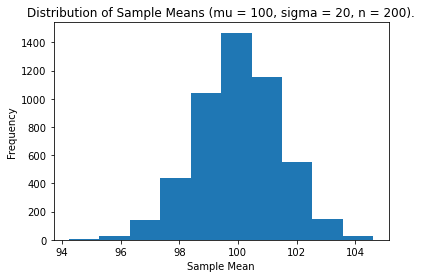

The mean of the DOSM is: 100.0157.
The standard deviation of the DOSM is: 1.4168.


In [8]:
# Variable definitions 
mu = 100
sigma = 20
sample_size = 200
number_samples = 5000

# Function call 
my_dosm = my_monte_carlo_function(mu, sigma, sample_size, number_samples)

# Results
plt.hist(my_dosm)
plt.title(f'Distribution of Sample Means (mu = {mu}, sigma = {sigma}, n = {sample_size}).')
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')
plt.show()

print(f'The mean of the DOSM is: {np.mean(my_dosm):.4f}.')
print(f'The standard deviation of the DOSM is: {np.std(my_dosm):.4f}.') 

### <font color="blue"> *Problem 2a*</font>

Now that I have made a DOSM, I should be able to make a very small edit to the Monte Carlo function above and have it respond with an array of sample standard deviations instead of an array of sample means. 

In addition to producing a DOSD, will change the 'sample_one' code to change the distribution you are randomly sampling from a Gaussian to a UNIFORM distribution. 


In [9]:
# Define the edited sampling function here so that it samples from a uniform distribution. 
# (Be sure to change the function name so that you don't over-write the function above).
def sample_one_uni(a, b, sample_size):
    """A function to take a single sample from a uniformly-distributed population.
    Input:  a, the lower boudary
            b, the upper boundary
            sample_size, an integer value indicating the sample size to use
    Return: this_sample, an array containing the values you sampled.
    """
    this_sample = np.empty(sample_size) 
    for i in range(sample_size):
        this_sample[i] = random.uniform(a, b)
    return this_sample 

# Define the edited Monte Carlo function

def std_monte_carlo_function(a, b, n, iterations):
    """A function to take Monte Carlo samples, compute their standard deviations, and return an array of sample standard deviations.
    Input: a, the lower boundary of distribution
           b, the lower boundary of distribution
           n, the size of each indivdual sample
           iterations, the number of samples to take
    Return: sample_stds, an array of sample standard deviations.
    """
    sample_stds = np.empty(iterations)
    for i in range(iterations):
        sample_stds[i] = np.std(sample_one_uni(a, b, n))
    return sample_stds

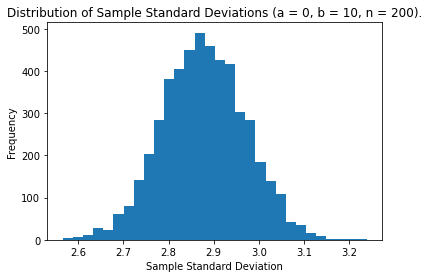

The mean of the DOSS is: 2.8779.
The standard deviation of the DOSS is: 0.0920.


In [10]:
# Call the edited function, plot the result and print the mean/standard deviation. Use the values 0 and 10 for the 
# lower and upper boundaries of your uniform distribution. Define the other parameters.
a = 0
b = 10 
sample_size = 200
number_samples = 5000

my_dossd = std_monte_carlo_function(a, b, sample_size, number_samples)

plt.hist(my_dossd, bins = 30)
plt.title(f'Distribution of Sample Standard Deviations (a = {a}, b = {b}, n = {sample_size}).')
plt.ylabel('Frequency')
plt.xlabel('Sample Standard Deviation')
plt.show()

print(f'The mean of the DOSS is: {np.mean(my_dossd):.4f}.')
print(f'The standard deviation of the DOSS is: {np.std(my_dossd):.4f}.') 

### <font color="blue"> *Problem 2b*</font>

Does the distribution produced by this sampling process look like it came from a uniform distribution? Why or why not? 


<font color="red">The distribution does not look like it came from a uniform distribution. A uniform distribution means that all outcomes are equally likely within a given range, so the histogram would appear flat, with each bin having approximately the same frequency. Sample standard deviations look at the variability within samples. The DOSS reflects the variability within each sample, with the distribution clusterring around the population standard deviation 2.8766. So it resembles the bell curve of a normal distribution rather than a flat, uniform one.


### <font color="blue"> *Problem 3a*</font>

Three paramters are defined in the code block below (population mu = 100; population sigma = 15; & sample size = 100).
The code cell below contains code that is ready to run. Run it and examine the histogram it produces. Then edit, one-at-a-time, the following three parameters (execute the cell several times at each value to resample the code):

- population mu (try at least three values from 0 to 200)
- population sigma (try at least four values from 0 to 20)
- sample size (try at least five values from n = 10 to n = 200)

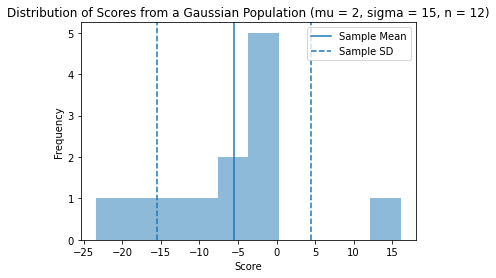

In [11]:
population_mu = 2
population_sigma = 15
sample_size = 12

current_sample = sample_one(population_mu, population_sigma, sample_size)
plt.hist(current_sample, alpha=.5)
plt.title(f'Distribution of Scores from a Gaussian Population (mu = {population_mu}, sigma = {population_sigma}, n = {sample_size})')
plt.axvline(np.mean(current_sample), label='Sample Mean')
plt.axvline((np.mean(current_sample) - np.std(current_sample, ddof=1)), linestyle='dashed', label='Sample SD')
plt.axvline((np.mean(current_sample) + np.std(current_sample, ddof=1)), linestyle='dashed')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.legend()
plt.show()

### <font color="blue"> *Problem 3b*</font>

This code draws from a normal distribution. Do the distributions look normal? How does increasing the value of each parameter change the resulting distribution? 




 - Mu: <font color="red"> Changing the population mean will shift the center of the distribution to reflect a new mean value, but the overall shape of the distribution will still be normal.
 
 
 - Sigma: <font color="red"> Increasing the population standard deviation will make both the distribution more spread out, while decreasing sigma will make it narrower.
 
 
 - Sample size: <font color="red"> Increasing the number of samples will increase the smoothness of the distribution. The histogram will become more precise in reflecting a normal distribution as more samples are taken, and the overall shape stabilizes.
 
 

# 
# 

# Probability

The next part of this lab will examine probability. We will be calculating the likelihood of events occuring, given a sample space.

Here are your M&Ms: ['Orange', 'Green', 'Green', 'Yellow', 'Blue', 'Yellow', 'Red', 'Brown', 'Orange', 'Blue', 'Blue', 'Brown', 'Brown', 'Brown', 'Blue', 'Green', 'Yellow', 'Blue', 'Green', 'Green', 'Green']

Here is a histogram your M&Ms, by colour (for easier counting):


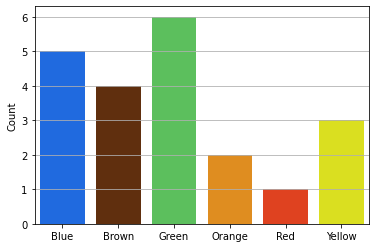

In [12]:
n = np.random.randint(17, 30)
c = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Brown']
s = random.choices(c, k=n, weights=[random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9)])
print(f'Here are your M&Ms: {s}')
labels, counts = np.unique(s,return_counts=True)
i = 0
m_and_ms = dict()
for label in labels:
    m_and_ms[label] = counts[i]
    i += 1
print(f'\nHere is a histogram your M&Ms, by colour (for easier counting):')
import seaborn as sns
palette = {'Blue': '#0063ff', 'Brown': '#6E2C00', 'Red': '#Ff2d00', 'Green': '#4bd04d', 'Yellow': '#F8ff00', 'Orange': '#Ff9200'}
ax = sns.barplot(x = list(m_and_ms.keys()), y = list(m_and_ms.values()), palette=palette)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylabel('Count')
plt.show()

Let's start by calculating the distribution of the sample. This allows us to determine the probability of each event in the sample space. To simplify this idea, we will think about this in the context of a random draw of a single M&M. Basically, we want to figure out the chance of randomly drawing an M&M of each colour, given the sample.

In [13]:
total_candy = len(s)
print(f'There are {total_candy} M&Ms in the sample.')

There are 21 M&Ms in the sample.


In [14]:
print(m_and_ms)

{'Blue': 5, 'Brown': 4, 'Green': 6, 'Orange': 2, 'Red': 1, 'Yellow': 3}


Now what we need to do is to divide each of these numbers by the total number of M&Ms. Do this in a loop using the candy colour to index the dictionary 

In [15]:
for candy_colour in m_and_ms:
    print(f'The proportion of {candy_colour} M&Ms in the sample is: {m_and_ms[candy_colour] / total_candy: .2f}')

The proportion of Blue M&Ms in the sample is:  0.24
The proportion of Brown M&Ms in the sample is:  0.19
The proportion of Green M&Ms in the sample is:  0.29
The proportion of Orange M&Ms in the sample is:  0.10
The proportion of Red M&Ms in the sample is:  0.05
The proportion of Yellow M&Ms in the sample is:  0.14


Now select a specific candy color.

Candy colour: Brown

Now, print the proportion of times a random draw (with replacement) would give that M&M colour

In [16]:
 print(f'The probability of drawing a BROWN M&M from my sample is: {m_and_ms["Brown"]} divided by {total_candy} = {m_and_ms["Brown"] / total_candy: .2f}')

The probability of drawing a BROWN M&M from my sample is: 4 divided by 21 =  0.19


What's the chance that your next draw is the same colour? 


Well, that will depend on whether I eat the M&M (the likelihood of the second event will depend on the first event) or toss it back into the sample (the likelihood of the second event will be independent of the first event).

Conceptually, if two events are independent, knowing something about the likelihood of one event tells us nothing about the likelihood of another. 

Here is an example. If I commute to work on foot nearly every single day (rain or shine), knowing whether it's raining or sunny today is not going to affect the likelihood that I will walk to work (I nearly always walk). These events (me walking and the current weather) are independent. If I'm a fair-weather walker, I only walk to work when it's sunny, then knowing whether it's raining or sunny today IS going to affect the likelihood that I will walk to work, such that the likelihood that I walk to work will increase as the weather becomes nicer. These events are dependent.

Let's try the independent calculation below. Before we do that, we will have a look at our candy to check the values (don't forget that if you are looking at a candy colour that is not blue, you'll need to substitute that candy colour into the equations as needed).

the equation is:

$$ P(A|B) = P(A and B) / P(B) $$

For independent events, the joint probability of both events is simply: $$ P(A and B) = P(A) * P(B) $$

In [17]:
# Start by reminding what the variables are.
# Original values, before we selected the first brown candy.

print(f'The total number of candies is: {total_candy}.')
print(f'The total number of Brown candies is: {m_and_ms["Brown"]}.')
print(f'The probability of selecting a Brown candy in a random pick is: {m_and_ms["Brown"] / total_candy:.2f}.')
print(f'We will make this number a variable: "p_brown" and round it to 2 decimal places (for simplicity).')
p_brown = round(m_and_ms["Brown"] / total_candy, 2)

The total number of candies is: 21.
The total number of Brown candies is: 4.
The probability of selecting a Brown candy in a random pick is: 0.19.
We will make this number a variable: "p_brown" and round it to 2 decimal places (for simplicity).


In [18]:
# Now, if we replace the candy (we toss it back into the sample), our values are the same as above.

print(f'The original probability of a brown candy was: {p_brown}.')
print(f'Because the numbers have not changed, the probability of brown on the next pick is (still): {p_brown}.')
print(f'When two events are independent, their probabilities for occurring are unrelated.')
print(f'Plugging the numbers into the formula, we get: P(brown2|brown1) = (P(brown2) * P(brown1)) / P(brown1) = {(p_brown * p_brown) / p_brown}.')
print(f'\nWhen events are independent, the probability of one event given another is simply the probability of \nthe original event.')


The original probability of a brown candy was: 0.19.
Because the numbers have not changed, the probability of brown on the next pick is (still): 0.19.
When two events are independent, their probabilities for occurring are unrelated.
Plugging the numbers into the formula, we get: P(brown2|brown1) = (P(brown2) * P(brown1)) / P(brown1) = 0.19.

When events are independent, the probability of one event given another is simply the probability of 
the original event.


### <font color="blue"> *Problem 5*</font>

Formula in the Markdown cell under this one, then the calculation in the following code cell and print your results


FORMULA: <font color="red">  number of REMAINING brown candies divided by the number of REMAINING total candies
    





In [19]:
# The dependent calculation is (check to make sure your parentheses are in the right places):
p_brown_g_brown1 = (m_and_ms["Brown"]- 1) / (total_candy - 1)

print(f'The total number of candies is: {total_candy}.')
print(f'The total number of Brown candies is: {m_and_ms["Brown"]}.')
print(f'The probability of selecting a Brown candy on the first pick is: {p_brown:.2f}.')
print(f'After picking and eating a Brown candy, the probability of selecting another Brown candy is: {p_brown_g_brown1:.2f}.')
print(f'\nSo, P(brown2|brown1) when we do not replace the first candy is: {p_brown_g_brown1:.2f}.')


The total number of candies is: 21.
The total number of Brown candies is: 4.
The probability of selecting a Brown candy on the first pick is: 0.19.
After picking and eating a Brown candy, the probability of selecting another Brown candy is: 0.15.

So, P(brown2|brown1) when we do not replace the first candy is: 0.15.


### <font color="blue"> *Problem 6*</font>

How does the idea of probability relate to 1) sample distributions and 2) sampling distributions in statistics?

<font color="red"> Probability of an event happening in the sample is based on the underlying population distribution. If the population is normally distributed, the probability of observing values near the mean is higher than values far from the mean.

<font color="red"> In a sampling distribution, probability describes the distribution of sample statistics. In distributions of sample means from a population, it would probably reflect normal distributions as the sample size goes up. Probability can help find the likelihood of observing a particular sample mean given a population mean. 

<font color="red"> TLDR: Sample Distributions focus on the probability of individual data points in a sample, while sampling Distributions focus on the probability of a mean or proportion calculated from many samples.

